In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# 파일 불러오기
v5_path = "/home/eunyu/master_last_v5.csv"
all_path = "/home/eunyu/master_with_all.csv"

v5_df = pd.read_csv(v5_path)
all_df = pd.read_csv(all_path)

# 각 데이터프레임의 shape 확인
v5_df.shape, all_df.shape


((2507, 23), (4845, 19))

In [6]:
v5_df

,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,gender,...,votes_within_3d,period_friend_count,retention_group,address,student_count,school_type,firstquestion_id,first_question_text,first_question_category,chosen_count
0,0,838466,129,7,2023-05-02,2023-06-02,31,2023-05-02,0.569444,F,...,77,63.0,top25,충청남도 아산시,578,H,298,옷이 제일 많을 거 같은 사람은?,['스타일'],342.0
1,1,838642,10,2,2023-04-28,2023-04-29,1,2023-04-28,0.560000,F,...,10,6.0,top25,충청남도 천안시 서북구,491,H,161,화목한 가정을 꾸릴거 같은 사람은?,['인간관계'],40.0
2,2,840512,141,8,2023-05-02,2023-07-11,70,2023-05-02,0.569444,M,...,69,16.0,top25,충청남도 아산시,578,H,219,마술이 눈속임이 아니라 마법이라고 생각할 것 같은 사람은?,['상상'],309.0
3,3,840685,567,21,2023-05-02,2023-06-06,35,2023-05-02,0.569444,F,...,259,69.0,top25,충청남도 아산시,578,H,120,본인 방이 제일 깨끗할거 같은 사람은?,['스타일'],256.0
4,4,840902,250,14,2023-05-02,2023-05-27,25,2023-05-02,0.569444,F,...,73,60.0,top25,충청남도 아산시,578,H,332,선물 고르는 센스가 가장 좋을 것 같은 사람은?,['스타일'],201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,2502,1497413,335,13,2023-05-24,2023-07-28,65,2023-05-24,0.294118,M,...,152,35.0,bottom25,경상남도 거제시,483,H,1046,졸업 후 동창회에서 청첩장 돌릴 것 같은 친구는?,['인간관계'],199.0
2503,2503,1497699,15,2,2023-05-24,2023-05-25,1,2023-05-24,0.294118,M,...,15,2.0,bottom25,충청남도 천안시 서북구,491,H,336,제대로 놀 때 부르고 싶은 친구는?,['인간관계'],12.0
2504,2504,1498168,268,15,2023-05-24,2023-06-09,16,2023-05-24,0.294118,M,...,54,23.0,bottom25,경상남도 거제시,483,H,911,답장 속도가 가장 빠른 사람은?,['인간관계'],146.0
2505,2505,1498266,4,1,2023-05-24,2023-05-24,0,2023-05-24,0.294118,F,...,4,28.0,bottom25,울산광역시 울주군,550,H,914,예술감각이 가장 뛰어난 친구는?,['스타일'],34.0


# 상위 하위 25% 지표

In [11]:
# school_type 값 고유 확인
v5_df["school_type"].value_counts(dropna=False)



school_type
H    2000
M     507
Name: count, dtype: int64

- 고등학생: 2000명
- 중학생: 507명

In [ ]:
v5_df.columns

Index(['Unnamed: 0', 'user_id', 'total_votes', 'unique_days', 'first_vote',
       'last_vote', 'active_days', 'cohort_day', 'retention_day8', 'gender',
       'school_id', 'grade', 'group_id', 'votes_within_3d',
       'period_friend_count', 'retention_group', 'address', 'student_count',
       'school_type', 'firstquestion_id', 'first_question_text',
       'first_question_category', 'chosen_count'],
      dtype='object')

### 코호트 분석 학교 타입

In [10]:
# 중/고등학생 비율 다시 계산
cohort_summary = (
    v5_df[v5_df["retention_group"].isin(["top25", "bottom25"])]
    .groupby(["retention_group", "school_type"])["user_id"]
    .count()
    .unstack(fill_value=0)
)

# 비율 계산 (H: 고등학생, M: 중학생)
cohort_summary["중학생 비중"] = cohort_summary.get("M", 0) / cohort_summary.sum(axis=1)
cohort_summary["고등학생 비중"] = cohort_summary.get("H", 0) / cohort_summary.sum(axis=1)

# 결과 정리
cohort_summary_result = cohort_summary[["고등학생 비중", "중학생 비중"]] * 100
cohort_summary_result = cohort_summary_result.round(1).reset_index().rename(columns={"retention_group": "cohort"})

display(cohort_summary_result)

school_type,cohort,고등학생 비중,중학생 비중
0,bottom25,95.4,4.6
1,top25,64.4,35.6


→ 중학생 비중이 상위 리텐션 그룹에서 유의하게 높음

#### z-test

In [13]:
import sys
sys.path.append('/home/eunyu/.local/share/pipx/shared/lib/python3.12/site-packages')
from statsmodels.stats.proportion import proportions_ztest

# 중학생 수
m_top = v5_df[(v5_df["retention_group"] == "top25") & (v5_df["school_type"] == "M")].shape[0]
m_bottom = v5_df[(v5_df["retention_group"] == "bottom25") & (v5_df["school_type"] == "M")].shape[0]

# 전체 수
n_top = v5_df[v5_df["retention_group"] == "top25"].shape[0]
n_bottom = v5_df[v5_df["retention_group"] == "bottom25"].shape[0]

# z-test for two proportions
count = [m_top, m_bottom]
nobs = [n_top, n_bottom]

z_stat, p_val = proportions_ztest(count, nobs)

z_stat, p_val


(19.35067561685433, 2.0118760068034934e-83)

- Z-statistic: 19.35
- P-value: ≈ 2.01 × 10⁻⁸³ (매우 작음)



- 상위 25% 리텐션 그룹과 하위 25% 그룹 간의 중학생 비율 차이는 통계적으로 유의미
- P-value가 0.05보다 훨씬 작기 때문에, → "상위 리텐션 그룹에서 중학생 비중이 높다"는 현상은 우연이 아닐 가능성이 매우 큼을 의미
- 즉, 중학생은 리텐션이 좋은 유저군으로 간주할 수 있으며, 중학생을 타겟으로 한 전략 수립의 근거가 충분

In [14]:
# days_to_vote (활동 기간) = last_vote - first_vote + 1
v5_df["first_vote"] = pd.to_datetime(v5_df["first_vote"], errors="coerce")
v5_df["last_vote"] = pd.to_datetime(v5_df["last_vote"], errors="coerce")
v5_df["active_days"] = (v5_df["last_vote"] - v5_df["first_vote"]).dt.days + 1

# vote_acquisition_rate = chosen_count / active_days
v5_df["vote_acquisition_rate"] = v5_df["chosen_count"] / v5_df["active_days"]

# 중학생 + 리텐션 그룹 필터
middle_v5_df = v5_df[(v5_df["school_type"] == "M") & v5_df["retention_group"].isin(["top25", "bottom25"])]

# 그룹별 평균 비교
grouped_rate = (
    middle_v5_df.groupby("retention_group")["vote_acquisition_rate"]
    .agg(["mean", "count"])
    .rename(columns={"mean": "평균 투표 획득률", "count": "유저 수"})
    .reset_index()
)

# Welch t-test & Mann-Whitney U test
from scipy.stats import ttest_ind, mannwhitneyu

top = middle_v5_df[middle_v5_df["retention_group"] == "top25"]["vote_acquisition_rate"].dropna()
bottom = middle_v5_df[middle_v5_df["retention_group"] == "bottom25"]["vote_acquisition_rate"].dropna()

t_stat, t_pval = ttest_ind(top, bottom, equal_var=False)
u_stat, u_pval = mannwhitneyu(top, bottom, alternative='two-sided')

grouped_rate, (t_stat, t_pval), (u_stat, u_pval)


(  retention_group  평균 투표 획득률  유저 수
 0        bottom25   8.129761    57
 1           top25  17.573497   450,
 (4.125825724789996, 6.844504811367063e-05),
 (19799.5, 2.19184263659001e-11))

통계 검정 결과               
- Welch’s t-test → t = 4.13, p = 0.00007 
- Mann-Whitney U test → U = 19,799.5, p = 2.19e-11

- 상위 리텐션 집단은 하루 평균 17.6건의 투표를 받았으며,             
하위 집단은 8.1건에 불과해 2배 이상의 차이가 난다.           
- 두 검정 모두에서 p < 0.001이므로,→ 해당 차이는 우연이 아닌 통계적으로 유의한 차이       

- 많은 투표를 받은 중학생일수록 리텐션이 높다는 가설을 강하게 지지한다.

## A/B 테스트 설계

In [15]:
users_df = pd.read_parquet("gs://final_project_enuyu/data/final_project/votes/accounts_user.parquet")

In [17]:
users_df["created_at"] = pd.to_datetime(users_df["created_at"])
v5_df["first_vote"] = pd.to_datetime(v5_df["first_vote"])

users_df = users_df.rename(columns={"id": "user_id"})

#  가입일 병합
days_to_vote_df = v5_df[["user_id", "first_vote"]].merge(
    users_df[["user_id", "created_at"]],
    on="user_id",
    how="left"
)

# days_to_vote 계산
days_to_vote_df["days_to_vote"] = (days_to_vote_df["first_vote"] - days_to_vote_df["created_at"]).dt.days
days_to_vote_df["days_to_vote"] = days_to_vote_df["days_to_vote"].apply(lambda x: max(x, 0))

# 최종 마스터 병합
final_master_df = v5_df.merge(
    days_to_vote_df[["user_id", "days_to_vote"]],
    on="user_id",
    how="left"
)

In [19]:
v5_df.columns

Index(['Unnamed: 0', 'user_id', 'total_votes', 'unique_days', 'first_vote',
       'last_vote', 'active_days', 'cohort_day', 'retention_day8', 'gender',
       'school_id', 'grade', 'group_id', 'votes_within_3d',
       'period_friend_count', 'retention_group', 'address', 'student_count',
       'school_type', 'firstquestion_id', 'first_question_text',
       'first_question_category', 'chosen_count', 'days_to_vote',
       'vote_acquisition_rate'],
      dtype='object')

### Treatment 그룹 평균

In [21]:
# Treatment 그룹 정의: votes_within_3d > 0 (즉, 3일 내 투표 참여한 유저)
treatment_group = v5_df[v5_df["votes_within_3d"] > 0]

# Treatment 그룹 평균 계산
treatment_summary = {
    "days_to_vote_mean": treatment_group["days_to_vote"].mean(),
    "votes_within_3d_mean": treatment_group["votes_within_3d"].mean(),
    "retention_day8_mean": treatment_group["retention_day8"].mean(),
    "chosen_count_mean": treatment_group["chosen_count"].mean()
}

treatment_summary

{'days_to_vote_mean': 19.08336657359394,
 'votes_within_3d_mean': 108.47945751894694,
 'retention_day8_mean': 0.4579178300757878,
 'chosen_count_mean': 216.3320031923384}

In [23]:
# votes_within_3d == 0인 유저 수 확인
control_zero_count = (v5_df["votes_within_3d"] == 0).sum()
control_zero_count


0

###  Control 그룹과 직접 비교하여 통계적 유의성 분석

In [24]:
# days_to_vote ≤ 3일 vs > 3일 기준으로 그룹 분할
treatment_group = v5_df[v5_df["days_to_vote"] <= 3]
control_group = v5_df[v5_df["days_to_vote"] > 3]

# 리텐션 컬럼 결측치 제거
treatment_ret = treatment_group["retention_day8"].dropna()
control_ret = control_group["retention_day8"].dropna()

# t-test 수행
t_stat, p_val = ttest_ind(treatment_ret, control_ret, equal_var=False)

# 평균 리텐션 계산
treatment_mean = treatment_ret.mean()
control_mean = control_ret.mean()

{
    "t_stat": t_stat,
    "p_value": p_val,
    "treatment_mean": treatment_mean,
    "control_mean": control_mean,
    "treatment_n": len(treatment_ret),
    "control_n": len(control_ret)
}


{'t_stat': -12.073171489196145,
 'p_value': 9.441724875027655e-30,
 'treatment_mean': 0.3758342855102431,
 'control_mean': 0.47062168589063025,
 'treatment_n': 336,
 'control_n': 2171}

# 이성에게 받은 투표 다시 

In [6]:

# 파일 불러오기
v6_df = pd.read_csv('/home/eunyu/master_table_v6.csv')
all_df = pd.read_csv('/home/eunyu/master_with_all.csv')

# 컬럼 확인
v6_df_cols = set(v6_df.columns)
all_df_cols = set(all_df.columns)

# 공통 컬럼 확인
common_columns = v6_df_cols & all_df_cols

# 결과 반환
v6_df.shape, all_df.shape, common_columns


((2507, 33),
 (4845, 19),
 {'active_days',
  'cohort_day',
  'first_vote',
  'gender',
  'grade',
  'group_id',
  'last_vote',
  'retention_day8',
  'school_id',
  'total_votes',
  'unique_days',
  'user_id'})

In [29]:
# 사용할 컬럼만 추출 ('user_id' 포함)
selected_columns = ['user_id', 'total_votes_received', 'opposite_votes_received', 'opposite_vote_ratio', 'same_gender_votes_received']
all_df_selected = all_df[selected_columns]

# 병합
v6_merged = v6_df.merge(all_df_selected, on='user_id', how='left')

# 결과 형태 확인
v6_merged.shape


(2507, 37)

In [30]:
v6_merged

,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,gender,...,vote_sameday_signup,days_to_vote,days_to_point,days_to_point_after_vote,first_vote_hour,first_voteday_question_count,total_votes_received,opposite_votes_received,opposite_vote_ratio,same_gender_votes_received
0,0,838466,129,7,2023-05-02,2023-06-02,31,2023-05-02,0.569444,F,...,0,13,15.0,2.0,22,9,342,46,0.134503,296
1,1,838642,10,2,2023-04-28,2023-04-29,1,2023-04-28,0.560000,F,...,0,8,10.0,1.0,14,9,40,4,0.100000,36
2,2,840512,141,8,2023-05-02,2023-07-11,70,2023-05-02,0.569444,M,...,0,11,11.0,0.0,23,1,309,125,0.404531,184
3,3,840685,567,21,2023-05-02,2023-06-06,35,2023-05-02,0.569444,F,...,0,11,11.0,0.0,22,12,256,102,0.398438,154
4,4,840902,250,14,2023-05-02,2023-05-27,25,2023-05-02,0.569444,F,...,0,10,11.0,0.0,22,6,201,57,0.283582,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,2502,1497413,335,13,2023-05-24,2023-07-28,65,2023-05-24,0.294118,M,...,1,0,0.0,0.0,15,36,199,40,0.201005,159
2503,2503,1497699,15,2,2023-05-24,2023-05-25,1,2023-05-24,0.294118,M,...,1,0,NaN,NaN,15,7,12,0,0.000000,12
2504,2504,1498168,268,15,2023-05-24,2023-06-09,16,2023-05-24,0.294118,M,...,1,0,0.0,0.0,17,3,146,86,0.589041,60
2505,2505,1498266,4,1,2023-05-24,2023-05-24,0,2023-05-24,0.294118,F,...,1,0,NaN,NaN,18,4,34,8,0.235294,26


In [31]:
# 'Unnamed: 0' 컬럼이 두 개 이상 있는 경우 제거
cols_to_drop = [col for col in v6_merged.columns if 'Unnamed' in col]
merged_df_6 = v6_merged.drop(columns=cols_to_drop)

# 인덱스 재설정 (기존 인덱스가 의미 없다면)
merged_df_6 = merged_df_6.reset_index(drop=True)


In [32]:
merged_df_6

,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,gender,school_id,...,vote_sameday_signup,days_to_vote,days_to_point,days_to_point_after_vote,first_vote_hour,first_voteday_question_count,total_votes_received,opposite_votes_received,opposite_vote_ratio,same_gender_votes_received
0,838466,129,7,2023-05-02,2023-06-02,31,2023-05-02,0.569444,F,369.0,...,0,13,15.0,2.0,22,9,342,46,0.134503,296
1,838642,10,2,2023-04-28,2023-04-29,1,2023-04-28,0.560000,F,271.0,...,0,8,10.0,1.0,14,9,40,4,0.100000,36
2,840512,141,8,2023-05-02,2023-07-11,70,2023-05-02,0.569444,M,369.0,...,0,11,11.0,0.0,23,1,309,125,0.404531,184
3,840685,567,21,2023-05-02,2023-06-06,35,2023-05-02,0.569444,F,369.0,...,0,11,11.0,0.0,22,12,256,102,0.398438,154
4,840902,250,14,2023-05-02,2023-05-27,25,2023-05-02,0.569444,F,369.0,...,0,10,11.0,0.0,22,6,201,57,0.283582,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,1497413,335,13,2023-05-24,2023-07-28,65,2023-05-24,0.294118,M,4426.0,...,1,0,0.0,0.0,15,36,199,40,0.201005,159
2503,1497699,15,2,2023-05-24,2023-05-25,1,2023-05-24,0.294118,M,271.0,...,1,0,NaN,NaN,15,7,12,0,0.000000,12
2504,1498168,268,15,2023-05-24,2023-06-09,16,2023-05-24,0.294118,M,4426.0,...,1,0,0.0,0.0,17,3,146,86,0.589041,60
2505,1498266,4,1,2023-05-24,2023-05-24,0,2023-05-24,0.294118,F,1719.0,...,1,0,NaN,NaN,18,4,34,8,0.235294,26


In [33]:
# 1. 상하위 25% 기준값 계산
q75 = merged_df_6["retention_day8"].quantile(0.75)
q25 = merged_df_6["retention_day8"].quantile(0.25)

# 2. 코호트 그룹 지정
def assign_retention_group(x):
    if x >= q75:
        return "top25"
    elif x <= q25:
        return "bottom25"
    else:
        return "middle"

merged_df_6["retention_group"] = merged_df_6["retention_day8"].apply(assign_retention_group)

# 3. 이성에게 받은 투표 수 비교 (top25 vs bottom25)
top25 = merged_df_6[merged_df_6["retention_group"] == "top25"]["opposite_votes_received"]
bottom25 = merged_df_6[merged_df_6["retention_group"] == "bottom25"]["opposite_votes_received"]

# 평균 계산
top_mean = top25.mean()
bottom_mean = bottom25.mean()

import sys
sys.path.append('/home/eunyu/.local/share/pipx/shared/lib/python3.12/site-packages')

# T-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(top25.dropna(), bottom25.dropna(), equal_var=False)

top_mean, bottom_mean, t_stat, p_val


(84.24726134585289,
 48.25615212527964,
 10.655146568875608,
 3.324386150114548e-25)

- Top 25% 코호트의 이성에게 받은 평균 투표 수: 84.25
- Bottom 25% 코호트의 평균: 48.26
- T-검정 통계량: 10.66
- p-value: 3.32e-25 (매우 유의미함)

 리텐션이 높은 상위 25% 유저는 하위 25%보다 이성에게 평균적으로 훨씬 더 많은 투표를 받았으며, 이 차이는 통계적으로 매우 유의미

#### 이성 투표 비율이 0이 아닌 유저 필터

In [35]:
# opposite_vote_ratio가 0이 아닌 데이터 필터링
filtered_df = merged_df_6[merged_df_6["opposite_vote_ratio"] != 0]

# top25 / bottom25 필터링
top25_ratio = filtered_df[filtered_df["retention_group"] == "top25"]["opposite_votes_received"]
bottom25_ratio = filtered_df[filtered_df["retention_group"] == "bottom25"]["opposite_votes_received"]

# 평균
top_mean_ratio = top25_ratio.mean()
bottom_mean_ratio = bottom25_ratio.mean()

# T-test
t_stat_ratio, p_val_ratio = ttest_ind(top25_ratio.dropna(), bottom25_ratio.dropna(), equal_var=False)

top_mean_ratio, bottom_mean_ratio, t_stat_ratio, p_val_ratio


(85.31537242472267,
 49.644418872266975,
 10.48952237175478,
 1.6634891834181372e-24)

- Top 25% 코호트의 평균 이성 투표 수: 85.32
- Bottom 25% 코호트의 평균 이성 투표 수: 49.64
- T-검정 통계량: 10.49
- p-value: 1.66e-24 → 매우 유의미

이성 투표 비율이 0이 아닌 유저들 사이에서도, 상위 리텐션 그룹은 유의미하게 더 많은 이성 투표를 받은 것으로 나타남

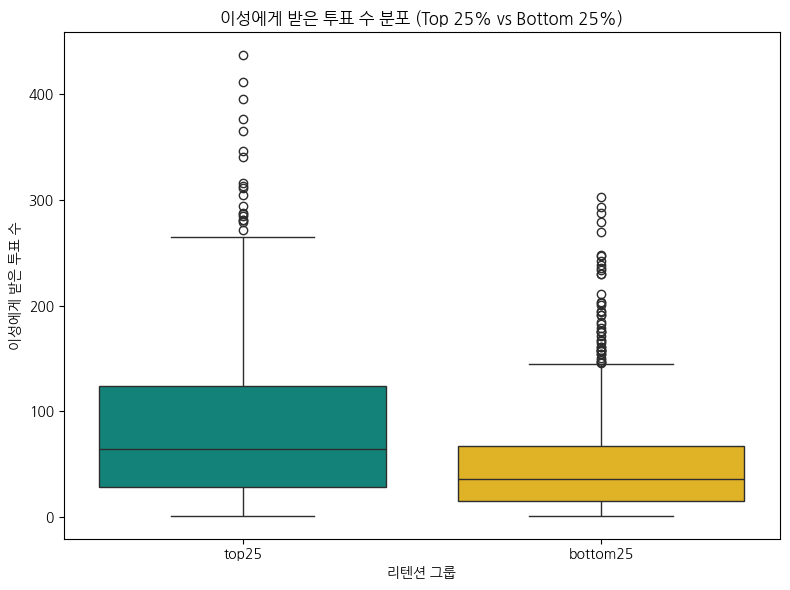

In [37]:
# 시각화용 데이터 준비
plot_data = filtered_df[filtered_df["retention_group"].isin(["top25", "bottom25"])][
    ["retention_group", "opposite_votes_received"]
]

# 색상 지정
custom_palette = {"top25": "#009688", "bottom25": "#ffc107"}

# 박스플롯 시각화 (색상 적용)
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=plot_data,
    x="retention_group",
    y="opposite_votes_received",
    hue="retention_group",  # 추가
    palette=custom_palette,
    dodge=False,  # 그룹을 분리하지 않음
    legend=False  # 범례 생략
)
plt.title("이성에게 받은 투표 수 분포 (Top 25% vs Bottom 25%)")
plt.xlabel("리텐션 그룹")
plt.ylabel("이성에게 받은 투표 수")
plt.tight_layout()
plt.show()


In [38]:
# top25 / bottom25 그룹의 이성 투표 비율(opposite_vote_ratio) 비교
top25_ratio = filtered_df[filtered_df["retention_group"] == "top25"]["opposite_vote_ratio"]
bottom25_ratio = filtered_df[filtered_df["retention_group"] == "bottom25"]["opposite_vote_ratio"]

# 평균 계산
top_mean_ratio = top25_ratio.mean()
bottom_mean_ratio = bottom25_ratio.mean()

# T-test
from scipy.stats import ttest_ind
t_stat_ratio, p_val_ratio = ttest_ind(top25_ratio.dropna(), bottom25_ratio.dropna(), equal_var=False)

top_mean_ratio, bottom_mean_ratio, t_stat_ratio, p_val_ratio


(0.28173792750409354,
 0.28590754112719974,
 -0.49131540891709274,
 0.6232792550776224)

- Top 25% 평균 비율: 0.2817
- Bottom 25% 평균 비율: 0.2859
- T-검정 통계량: -0.49
- p-value: 0.623

- 리텐션 상위/하위 그룹 간 이성 투표 비율의 차이는 통계적으로 유의하지 않음
- 총 받은 투표 수가 클수록 리텐션이 높을 가능성은 있지만, 이성 투표의 "비율"이 높아서 리텐션이 높은 것은 아님으로 해석
- 절대 수치(많이 받은 유저)가 리텐션과 관련이 있는 것이고, 이성 비율이 높다/낮다 자체는 큰 영향이 없다는 데이터 기반 인사이트

### 중고등 이성에게 받은 투표수

In [39]:
# 'school_type' 컬럼 분포 확인
school_type_counts = filtered_df["school_type"].value_counts(dropna=False)

# 중/고등학교 기준으로 opposite_votes_received 평균 비교
pivot_schooltype = (
    filtered_df[filtered_df["retention_group"].isin(["top25", "bottom25"])]
    .groupby(["retention_group", "school_type"])["opposite_votes_received"]
    .mean()
    .unstack()
)

school_type_counts, pivot_schooltype


(school_type
 H    1955
 M     498
 Name: count, dtype: int64,
 school_type              H          M
 retention_group                      
 bottom25         51.442945  22.500000
 top25            76.299435  96.837545)

##### opposite_vote_ratio 기준으로 다시 비교 

In [40]:
# 비율 기준 school_type별 평균 비교
pivot_ratio_schooltype = (
    filtered_df[filtered_df["retention_group"].isin(["top25", "bottom25"])]
    .groupby(["retention_group", "school_type"])["opposite_vote_ratio"]
    .mean()
    .unstack()
)

# school_type 기준, opposite_vote_ratio(이성 투표 비율) 비교
pivot_ratio_schooltype = (
    filtered_df[filtered_df["retention_group"].isin(["top25", "bottom25"])]
    .groupby(["retention_group", "school_type"])["opposite_vote_ratio"]
    .mean()
    .unstack()
)

pivot_ratio_schooltype


school_type,H,M
retention_group,,
bottom25,0.291440,0.202406
top25,0.310524,0.244950


In [41]:
from scipy.stats import normaltest, ttest_ind, mannwhitneyu

# 1) 집단별 시리즈 추출
middle_ratio = (
    filtered_df.loc[filtered_df["school_type"] == "M", "opposite_vote_ratio"]
    .dropna()
)
high_ratio = (
    filtered_df.loc[filtered_df["school_type"] == "H", "opposite_vote_ratio"]
    .dropna()
)

# 2) 각 집단 정규성 검정
m_p = normaltest(middle_ratio).pvalue
h_p = normaltest(high_ratio).pvalue

# 3) 적절한 두 집단 비교 검정 선택
if m_p > 0.05 and h_p > 0.05:        # 두 집단 모두 정규 분포로 가정 가능
    stat, pval = ttest_ind(middle_ratio, high_ratio, equal_var=False)  # Welch t-test
    test_used = "Independent t-test (Welch)"
else:                                # 둘 중 하나라도 정규성 기각
    stat, pval = mannwhitneyu(middle_ratio, high_ratio, alternative="two-sided")
    test_used = "Mann-Whitney U test"

# 4) 결과 출력
print(f"[{test_used}]")
print(f"중학생 평균: {middle_ratio.mean():.4f}, 고등학생 평균: {high_ratio.mean():.4f}")
print(f"통계량: {stat:.4f}, p-value: {pval:.4f}")
print(f"정규성 p-value (중): {m_p:.4f}, (고): {h_p:.4f}")


[Mann-Whitney U test]
중학생 평균: 0.2516, 고등학생 평균: 0.2927
통계량: 417032.0000, p-value: 0.0000
정규성 p-value (중): 0.0000, (고): 0.0000


- Mann-Whitney U test 결과
   - 평균 이성 투표 비율 (opposite_vote_ratio): 중학생/0.2516, 고등학생/0.2927
   - 정규성 p-value: 0.0000
   - 검정 통계량 (U): 417032.0000
   - p-value: < 0.0001 (유의미)

- 정규성 p-value가 모두 0.000 → 정규 분포 아님 → Mann-Whitney U test 사용 적절
- p-value < 0.001 → 두 그룹 간 분포 차이 유의미
- 평균 기준으로는 고등학생이 중학생보다 이성 투표 비율이 더 높음

In [42]:
# school_type이 'H'인 유저들의 retention_group 분포 확인
highschool_retention_dist = (
    filtered_df[filtered_df["school_type"] == "H"]["retention_group"]
    .value_counts(normalize=True)
    .rename_axis("retention_group")
    .reset_index(name="proportion")
)

highschool_retention_dist


,retention_group,proportion
0,bottom25,0.416880
1,middle,0.402046
2,top25,0.181074


- 고등학생 유저의 절반 이상(약 82%)은 Top 25%에 속하지 않음, 오히려 Bottom 25%가 가장 큰 비중(41.7%)
- 실제 리텐션은 낮은 경우가 많음을 의미할 수 있음
- 고등학생은 이성 투표 비율이 높아도 전반적으로 리텐션은 낮은 편



### 동성에게 받은 투표수

In [44]:
# school_type 기준 + retention_group 기준 + 동성에게 받은 투표 수 집계
pivot_same_votes = (
    filtered_df[filtered_df["retention_group"].isin(["top25", "bottom25"])]
    .groupby(["retention_group", "school_type"])["same_gender_votes_received"]
    .mean()
    .unstack()
)

pivot_same_votes

school_type,H,M
retention_group,,
bottom25,123.403681,89.648148
top25,166.107345,278.292419


- Top25 유저는 동성에게도 훨씬 더 많은 투표를 받음
- 특히 중학생은 동성 투표 수 차이가 극단적으로 큼 (Top25: 278 vs Bottom25: 90)
- 고등학생도 Top25 쪽이 높지만, 중학생의 양극화가 더 강함
- 동성 간 투표 경험도 리텐션과 밀접한 관련이 있을 수 있음



# 중학생 관련해서 행동 특성 지표

In [2]:

# 파일 불러오기
v6_df = pd.read_csv('/home/eunyu/master_table_v6.csv')

# 컬럼 확인
v6_df_cols = set(v6_df.columns)

# 결과 반환
v6_df


,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,gender,...,sign_up_date,first_vote_date,first_point_use_date,first_point_use_amount,vote_sameday_signup,days_to_vote,days_to_point,days_to_point_after_vote,first_vote_hour,first_voteday_question_count
0,0,838466,129,7,2023-05-02,2023-06-02,31,2023-05-02,0.569444,F,...,2023-04-19 15:10:56.560337,2023-05-02 22:42:05,2023-05-05 07:32:34,-300.0,0,13,15.0,2.0,22,9
1,1,838642,10,2,2023-04-28,2023-04-29,1,2023-04-28,0.560000,F,...,2023-04-20 00:11:00.962160,2023-04-28 14:18:07,2023-04-30 06:49:01,-300.0,0,8,10.0,1.0,14,9
2,2,840512,141,8,2023-05-02,2023-07-11,70,2023-05-02,0.569444,M,...,2023-04-21 14:02:03.764186,2023-05-02 23:42:03,2023-05-03 05:10:18,-300.0,0,11,11.0,0.0,23,1
3,3,840685,567,21,2023-05-02,2023-06-06,35,2023-05-02,0.569444,F,...,2023-04-21 15:23:53.149852,2023-05-02 22:22:58,2023-05-03 02:56:17,-300.0,0,11,11.0,0.0,22,12
4,4,840902,250,14,2023-05-02,2023-05-27,25,2023-05-02,0.569444,F,...,2023-04-22 00:10:16.615160,2023-05-02 22:33:49,2023-05-03 13:03:16,-300.0,0,10,11.0,0.0,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,2502,1497413,335,13,2023-05-24,2023-07-28,65,2023-05-24,0.294118,M,...,2023-05-24 15:25:34.222838,2023-05-24 15:28:33,2023-05-24 16:15:50,-200.0,1,0,0.0,0.0,15,36
2503,2503,1497699,15,2,2023-05-24,2023-05-25,1,2023-05-24,0.294118,M,...,2023-05-24 15:46:42.625580,2023-05-24 15:47:22,NaN,NaN,1,0,NaN,NaN,15,7
2504,2504,1498168,268,15,2023-05-24,2023-06-09,16,2023-05-24,0.294118,M,...,2023-05-24 17:05:03.737980,2023-05-24 17:05:49,2023-05-25 09:03:53,-200.0,1,0,0.0,0.0,17,3
2505,2505,1498266,4,1,2023-05-24,2023-05-24,0,2023-05-24,0.294118,F,...,2023-05-24 18:11:40.915740,2023-05-24 18:15:38,NaN,NaN,1,0,NaN,NaN,18,4


In [3]:
# school_type별 분포 확인
v6_df["school_type"].value_counts(dropna=False)


school_type
H    2000
M     507
Name: count, dtype: int64

In [5]:
print(v6_df.groupby("retention_group")["period_friend_count"].mean())

retention_group
bottom25    41.774116
top25       48.811560
Name: period_friend_count, dtype: float64


In [7]:
import sys
sys.path.append('/home/eunyu/.local/share/pipx/shared/lib/python3.12/site-packages')
from scipy.stats import ttest_ind

## 리텐션 기준으로 상하위 25% 코호트 나누기

high_group = v6_df[v6_df['retention_group'] == 'top25']
low_group = v6_df[v6_df['retention_group'] == 'bottom25']

# 평균 계산
top_mean = high_group['period_friend_count'].mean()
bottom_mean = low_group['period_friend_count'].mean()

print(f"Top25 평균 친구 수: {top_mean:.2f}명")
print(f"Bottom25 평균 친구 수: {bottom_mean:.2f}명")

# 독립표본 t-test
t_stat, p_value = ttest_ind(high_group['period_friend_count'], low_group['period_friend_count'], equal_var=False)
print(f"\nT-test 결과: t-stat = {t_stat:.3f}, p-value = {p_value:.4f}")

Top25 평균 친구 수: 48.81명
Bottom25 평균 친구 수: 41.77명

T-test 결과: t-stat = 6.523, p-value = 0.0000


In [10]:
import sys
sys.path.append('/home/eunyu/.local/share/pipx/shared/lib/python3.12/site-packages')
from scipy.stats import ttest_ind

# 중/고등학생 필터링
df_school = v6_df[v6_df["school_type"].isin(["M", "H"])].copy()
df_school["school_label"] = df_school["school_type"].map({"M": "중학교", "H": "고등학교"})

# 비교 대상 컬럼
cols = [
    "retention_day8",
    "total_votes",
    "period_friend_count",
    "days_to_vote",
    "first_vote_hour",
    "first_voteday_question_count"
]

# 그룹별 평균
group_means_school = df_school.groupby("school_label")[cols].mean().round(2)

# T-test
school_ttest_results = []
for col in cols:
    m = df_school[df_school["school_label"] == "중학교"][col].dropna()
    h = df_school[df_school["school_label"] == "고등학교"][col].dropna()
    stat, pval = ttest_ind(m, h, equal_var=False)
    school_ttest_results.append((col, round(stat, 3), round(pval, 4)))

ttest_school_df = pd.DataFrame(school_ttest_results, columns=["지표", "T-stat", "P-value"])

group_means_school, ttest_school_df


(              retention_day8  total_votes  period_friend_count  days_to_vote  \
 school_label                                                                   
 고등학교                    0.43       243.64                43.89          0.51   
 중학교                     0.59       310.45                50.97          0.26   
 
               first_vote_hour  first_voteday_question_count  
 school_label                                                 
 고등학교                    10.48                         29.97  
 중학교                     11.10                         26.88  ,
                              지표  T-stat  P-value
 0                retention_day8  23.338   0.0000
 1                   total_votes   5.412   0.0000
 2           period_friend_count   4.826   0.0000
 3                  days_to_vote  -4.134   0.0000
 4               first_vote_hour   2.847   0.0045
 5  first_voteday_question_count  -2.660   0.0080)

In [11]:
# school_type 필터링 → 중/고등 구분
df_school = v6_df[v6_df["school_type"].isin(["M", "H"])].copy()
df_school["school_label"] = df_school["school_type"].map({"M": "중학교", "H": "고등학교"})

# retention_day8 기준 상하위 25% 구분
q75 = df_school["retention_day8"].quantile(0.75)
q25 = df_school["retention_day8"].quantile(0.25)

df_school["retention_group"] = df_school["retention_day8"].apply(
    lambda x: "High25" if x >= q75 else ("Low25" if x <= q25 else "Mid")
)

# 상/하위 25%만 필터링
df_topbot = df_school[df_school["retention_group"].isin(["High25", "Low25"])]

# 비교 지표
compare_cols = [
    "total_votes",
    "period_friend_count",
    "days_to_vote",
    "first_vote_hour",
    "first_voteday_question_count"
]

# 그룹별 평균
group_means_by_retgroup = df_topbot.groupby(["school_label", "retention_group"])[compare_cols].mean().round(2)

# T-test: 중학교와 고등학교 각각 내부에서 High25 vs Low25 비교
ttest_results = []
for school in ["중학교", "고등학교"]:
    temp = df_topbot[df_topbot["school_label"] == school]
    for col in compare_cols:
        high = temp[temp["retention_group"] == "High25"][col].dropna()
        low = temp[temp["retention_group"] == "Low25"][col].dropna()
        stat, pval = ttest_ind(high, low, equal_var=False)
        ttest_results.append((school, col, round(stat, 3), round(pval, 4)))

ttest_school_by_group = pd.DataFrame(ttest_results, columns=["학교", "지표", "T-stat", "P-value"])

group_means_by_retgroup, ttest_school_by_group

(                              total_votes  period_friend_count  days_to_vote  \
 school_label retention_group                                                   
 고등학교         High25                304.56                46.55          1.85   
              Low25                 214.28                44.59          0.28   
 중학교          High25                352.46                60.93          0.22   
              Low25                 192.60                27.96          0.63   
 
                               first_vote_hour  first_voteday_question_count  
 school_label retention_group                                                 
 고등학교         High25                     12.94                         22.45  
              Low25                      10.05                         33.40  
 중학교          High25                     11.63                         23.29  
              Low25                      10.19                         25.53  ,
      학교                            지

- 중학생의 리텐션 상위 그룹은 친구 수가 월등히 많고 투표도 더 활발함.
- 고등학생은 리텐션이 높은 경우 오히려 첫 투표까지 시간이 더 오래 걸림(1.85일) → 첫날 반응이 빠른 그룹보다 더 오래 남는 경향.
- 고등학교 Low25 그룹은 첫날 받은 질문 수가 많음에도 리텐션이 낮았음 → 과다한 초반 노출이 리텐션에 부정적일 수도?

In [14]:
# school_type이 있는 원본 df에서 리텐션 평균/유저 수 계산
school_ret_labeled = v6_df[v6_df["school_type"].isin(["M", "H"])].copy()
school_ret_labeled["school_label"] = school_ret_labeled["school_type"].map({"M": "중학교", "H": "고등학교"})

# groupby로 요약
school_grouped = school_ret_labeled.groupby(["school_label", "school_id"])["retention_day8"] \
    .agg(["mean", "count"]).reset_index()
school_grouped.columns = ["school_label", "school_id", "retention_day8_mean", "user_count"]

# 각 그룹에서 상위/하위 10개씩 추출
ranked_tables = []

for label in ["중학교", "고등학교"]:
    df_sub = school_grouped[school_grouped["school_label"] == label]
    top = df_sub.sort_values("retention_day8_mean", ascending=False).head(10).copy()
    bot = df_sub.sort_values("retention_day8_mean", ascending=True).head(10).copy()
    top["label"] = "활성도 우수"
    bot["label"] = "이탈률 높은 학교"
    ranked_tables.append(pd.concat([top, bot]))

school_rank_by_type = pd.concat(ranked_tables).sort_values(["school_label", "retention_day8_mean"], ascending=[True, False])

school_rank_by_type


,school_label,school_id,retention_day8_mean,user_count,label
4,고등학교,4426.0,0.576505,267,활성도 우수
4,고등학교,4426.0,0.576505,267,이탈률 높은 학교
0,고등학교,271.0,0.521347,180,활성도 우수
0,고등학교,271.0,0.521347,180,이탈률 높은 학교
7,고등학교,5491.0,0.515006,271,활성도 우수
7,고등학교,5491.0,0.515006,271,이탈률 높은 학교
6,고등학교,5372.0,0.408945,220,활성도 우수
6,고등학교,5372.0,0.408945,220,이탈률 높은 학교
2,고등학교,369.0,0.380603,248,활성도 우수
2,고등학교,369.0,0.380603,248,이탈률 높은 학교
